<a href="https://colab.research.google.com/github/Joanne1228-coder/Wine-Classification-Using-NEURAL-NETWORK/blob/main/Lab_Work_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Wine Classification Using NEURAL NETWORK**
Name: Joanne Lim Zi Xuan

Matric No.: 22004882/1

Occurence: Occ 5

Lecturer: Dr. Loo Chu Kiong


**Install ANN Visualiser**

In [ ]:
pip install ann_visualizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Import Libraries**

In [ ]:
# Data preparation
import pandas as pd
import numpy as np

# Data Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Data Splitting
from sklearn.model_selection import train_test_split

# Data Standardisation
from sklearn.preprocessing import StandardScaler

# Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Vizualization of Neural Network
from tensorflow.keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
import graphviz
from PIL import Image

# Evaluation
from sklearn import metrics
from sklearn.metrics import classification_report

# Hypertuning
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# **Data Preparation**

**Upload datases from GitHub (Save as winequality-red.csv and winequality-white.csv**

[Link to datasets](https://github.com/Joanne1228-coder/ML_Labwork2)


In [ ]:
# Read the second CSV file
df1 = pd.read_csv('/content/winequality-white.csv')

# Read the first CSV file
df2 = pd.read_csv('/content/winequality-red.csv')

**EDA**

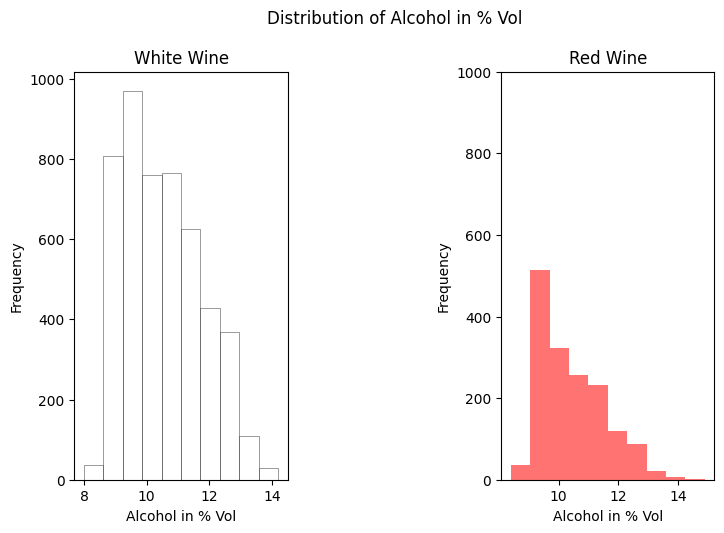

In [ ]:
fig, ax = plt.subplots(1, 2)

ax[0].hist(df1.alcohol, 10, facecolor='white', ec="black", lw=0.5, alpha=0.55, label="White wine")
ax[1].hist(df2.alcohol, 10, facecolor='red', alpha=0.55, label="Red wine")

fig.subplots_adjust(left=0, right=1, bottom=0, top=0.85, hspace=0.05, wspace=1)

#graph for frequency vs alcohol(White wine)
ax[0].set_title("White Wine")
ax[0].set_xlabel("Alcohol in % Vol")
ax[0].set_ylabel("Frequency")

#graph for frequency vs alcohol(Red wine)
ax[1].set_title("Red Wine")
ax[1].set_ylim([0, 1000])
ax[1].set_xlabel("Alcohol in % Vol")
ax[1].set_ylabel("Frequency")

fig.suptitle("Distribution of Alcohol in % Vol")

plt.show()

White Wine

In [ ]:
df1.shape

(4898, 12)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [ ]:
df1.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [ ]:
df1.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# Outlier analysis for white wine
q1, q3 = np.percentile(df1, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
#create conditions to isolate the outliers
outliers = df1[(df1 < lower_bound) | (df1 > upper_bound)]

print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               NaN               NaN          NaN             NaN        NaN   
2               NaN               NaN          NaN             NaN        NaN   
3               NaN               NaN          NaN             NaN        NaN   
4               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
4893            NaN               NaN          NaN             NaN        NaN   
4894            NaN               NaN          NaN             NaN        NaN   
4895            NaN               NaN          NaN             NaN        NaN   
4896            NaN               NaN          NaN             NaN        NaN   
4897            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  

Red Wine

In [ ]:
df2.shape

(1599, 12)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Outlier analysis for red wine
q1, q3 = np.percentile(df2, [25, 75])
iqr = q3 - q1
lower_bound = q1 - 1.5*iqr
upper_bound = q3 + 1.5*iqr
#create conditions to isolate the outliers
outliers = df2[(df2 < lower_bound) | (df2 > upper_bound)]

print(outliers)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               NaN               NaN          NaN             NaN        NaN   
1               NaN               NaN          NaN             NaN        NaN   
2               NaN               NaN          NaN             NaN        NaN   
3               NaN               NaN          NaN             NaN        NaN   
4               NaN               NaN          NaN             NaN        NaN   
...             ...               ...          ...             ...        ...   
1594            NaN               NaN          NaN             NaN        NaN   
1595            NaN               NaN          NaN             NaN        NaN   
1596            NaN               NaN          NaN             NaN        NaN   
1597            NaN               NaN          NaN             NaN        NaN   
1598            NaN               NaN          NaN             NaN        NaN   

      free sulfur dioxide  

# **Data Preprocessing**

In [ ]:
# White wine
# Check if there is any null value
df1.isnull().sum()
# No null value, no handling method is needed

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Removal of duplicated rows(if any)
counter=0
rs,cs=df1.shape
temp=df1.copy()
temp.drop_duplicates(inplace=True)

if(temp.shape[0]==rs):
  print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-temp.shape[0]}')
    print(f'\n\033[1mInference:\033[0m Current Shape = {temp.shape}')
    df1=temp


Inference: Number of duplicates dropped/fixed ---> 937

Inference: Current Shape = (3961, 12)


In [ ]:
# Remove free sulfur dioxide
# Copy the dataset so old dataset no change
df1NoOutlier=df1.copy()

# IQR
# Calculate the upper and lower limits
Q1 = df1NoOutlier['free sulfur dioxide'].quantile(0.25)
Q3 = df1NoOutlier['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1NoOutlier['free sulfur dioxide']>=upper)[0]
lower_array = np.where(df1NoOutlier['free sulfur dioxide']<=lower)[0]

# Removing the outliers
df1NoOutlier.drop(index=df1NoOutlier.index[upper_array], inplace=True)
df1NoOutlier.drop(index=df1NoOutlier.index[lower_array], inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df1NoOutlier.shape)

New Shape:  (3913, 12)


In [ ]:
# Remove total and free sulfur dioxide
df1NoOutlier2=df1NoOutlier.copy()
# Calculate the upper and lower limits
Q1 = df1NoOutlier2['total sulfur dioxide'].quantile(0.25)
Q3 = df1NoOutlier2['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1NoOutlier2['total sulfur dioxide']>=upper)[0]
lower_array = np.where(df1NoOutlier2['total sulfur dioxide']<=lower)[0]

# Removing the outliers
df1NoOutlier2 = df1NoOutlier2.drop(index=df1NoOutlier2.index[upper_array][np.isin(upper_array,df1NoOutlier2.index)])
df1NoOutlier2 = df1NoOutlier2.drop(index=df1NoOutlier2.index[lower_array][np.isin(lower_array, df1NoOutlier2.index)])

# Print the new shape of the DataFrame
print("New Shape: ", df1NoOutlier2.shape)

New Shape:  (3903, 12)


In [ ]:
# Remove total sulfur dioxide
df1NoOutlier3=df1.copy()
# Calculate the upper and lower limits
Q1 = df1NoOutlier3['total sulfur dioxide'].quantile(0.25)
Q3 = df1NoOutlier3['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df1NoOutlier3['total sulfur dioxide']>=upper)[0]
lower_array = np.where(df1NoOutlier3['total sulfur dioxide']<=lower)[0]

# Removing the outliers
df1NoOutlier3 = df1NoOutlier3.drop(index=df1NoOutlier3.index[upper_array][np.isin(upper_array,df1NoOutlier3.index)])
df1NoOutlier3= df1NoOutlier3.drop(index=df1NoOutlier3.index[lower_array][np.isin(lower_array, df1NoOutlier3.index)])

# Print the new shape of the DataFrame
print("New Shape: ", df1NoOutlier3.shape)

New Shape:  (3950, 12)


In [ ]:
# Red Wine
# Check if there is any null value
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# Removal of duplicated rows(if any)
counter=0
rs,cs=df2.shape
temp=df2.copy()
temp=temp.drop_duplicates()
if(temp.shape[0]==rs):
  print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed = {rs-temp.shape[0]}')
    print(f'\n\033[1mInference:\033[0m Current Shape = {temp.shape}')
    df2=temp


Inference: Number of duplicates dropped/fixed = 240

Inference: Current Shape = (1359, 12)


In [ ]:
# Remove free sulfur dioxide
df2NoOutlier=df2.copy()

# IQR
# Calculate the upper and lower limits
Q1 = df2NoOutlier['free sulfur dioxide'].quantile(0.25)
Q3 = df2NoOutlier['free sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df2NoOutlier['free sulfur dioxide']>=upper)[0]
lower_array = np.where(df2NoOutlier['free sulfur dioxide']<=lower)[0]

# Removing the outliers
# Removing the outliers
df2NoOutlier.drop(index=df2NoOutlier.index[upper_array], inplace=True)
df2NoOutlier.drop(index=df2NoOutlier.index[lower_array], inplace=True)

# Print the new shape of the DataFrame
print("New shape:", df2NoOutlier.shape)

New shape: (1330, 12)


In [ ]:
# Remove total and free sulfur dioxide
df2NoOutlier2=df2NoOutlier.copy()
# Calculate the upper and lower limits
Q1 = df2NoOutlier2['total sulfur dioxide'].quantile(0.25)
Q3 = df2NoOutlier2['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df2NoOutlier2['total sulfur dioxide']>=upper)[0]
lower_array = np.where(df2NoOutlier2['total sulfur dioxide']<=lower)[0]

# Removing the outliers
df2NoOutlier2 = df2NoOutlier2.drop(index=df2NoOutlier2.index[upper_array][np.isin(upper_array,df2NoOutlier2.index)])
df2NoOutlier2 = df2NoOutlier2.drop(index=df2NoOutlier2.index[lower_array][np.isin(lower_array, df2NoOutlier2.index)])

# Print the new shape of the DataFrame
print("New Shape: ", df2NoOutlier2.shape)

New Shape:  (1291, 12)


In [ ]:
# Remove total sulfur dioxide
df2NoOutlier3=df2.copy()
# Calculate the upper and lower limits
Q1 = df2NoOutlier3['total sulfur dioxide'].quantile(0.25)
Q3 = df2NoOutlier3['total sulfur dioxide'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

# Create arrays of Boolean values indicating the outlier rows
upper_array = np.where(df2NoOutlier3['total sulfur dioxide']>=upper)[0]
lower_array = np.where(df2NoOutlier3['total sulfur dioxide']<=lower)[0]

# Removing the outliers
df2NoOutlier3 = df2NoOutlier3.drop(index=df2NoOutlier3.index[upper_array][np.isin(upper_array,df2NoOutlier3.index)])
df2NoOutlier3= df2NoOutlier3.drop(index=df2NoOutlier3.index[lower_array][np.isin(lower_array, df2NoOutlier3.index)])

# Print the new shape of the DataFrame
print("New Shape: ", df2NoOutlier3.shape)

New Shape:  (1320, 12)


**Merge White Wine Dataset with Red Wine Dataset**

In [ ]:
# Add a type column to declare if it is red or white
# Insert(loc, column, value, allow_duplicates=_NoDefault.no_default)
# Set white as 0
df1.insert(0,"Type",0)
df1.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [ ]:
# Set red as 1
df2.insert(0,"Type",1)
df2.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,1,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,1,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,1,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
5,1,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [ ]:
# Concatenate the two datasets vertically
merged_df = pd.concat([df1, df2])

# Save the merged dataset to a new CSV file
merged_df.to_csv('merged_dataset.csv', index=False)

mergedData = pd.read_csv('/content/merged_dataset.csv')
mergedData.head

<bound method NDFrame.head of       Type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0        0            7.0             0.270         0.36            20.7   
1        0            6.3             0.300         0.34             1.6   
2        0            8.1             0.280         0.40             6.9   
3        0            7.2             0.230         0.32             8.5   
4        0            6.2             0.320         0.16             7.0   
...    ...            ...               ...          ...             ...   
5315     1            6.8             0.620         0.08             1.9   
5316     1            6.2             0.600         0.08             2.0   
5317     1            5.9             0.550         0.10             2.2   
5318     1            5.9             0.645         0.12             2.0   
5319     1            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxid

In [ ]:
mergedData.shape

(5320, 13)

In [ ]:
mergedData.nunique().sort_values()

Type                      2
quality                   7
citric acid              89
fixed acidity           106
pH                      108
sulphates               111
alcohol                 111
free sulfur dioxide     135
volatile acidity        187
chlorides               214
total sulfur dioxide    276
residual sugar          316
density                 998
dtype: int64

**Standardisation**

In [ ]:
# Only standardise non-categorical feature
num_vars = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

# Standardise before splitting
# Copy a dataset so that the old dataset is not lost
scaler = StandardScaler().fit(mergedData[num_vars])

# Scale the non-categorical feature
mergedData[num_vars]= scaler.transform(mergedData[num_vars])

# Describe the resulting DataFrame
mergedData.describe()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,5320.000000,5.320000e+03,5.320000e+03,5.320000e+03,5320.000000,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5.320000e+03,5320.000000
mean,0.255451,3.419153e-16,-4.273941e-17,4.273941e-17,0.000000,1.282182e-16,4.273941e-17,-8.547883e-17,1.853822e-14,6.197215e-16,-2.136971e-17,7.265700e-16,5.795677
std,0.436155,1.000094e+00,1.000094e+00,1.000094e+00,1.000094,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,1.000094e+00,0.879772
min,0.000000,-2.588145e+00,-1.570028e+00,-2.164515e+00,-0.988604,-1.293816e+00,-1.630964e+00,-1.904371e+00,-2.504125e+00,-3.146985e+00,-2.092831e+00,-2.149768e+00,3.000000
25%,0.000000,-6.177717e-01,-6.784048e-01,-5.334545e-01,-0.721923,-5.070517e-01,-7.884267e-01,-7.065318e-01,-7.875618e-01,-7.150198e-01,-6.902954e-01,-8.848223e-01,5.000000
50%,0.000000,-1.630701e-01,-2.623138e-01,-5.772841e-02,-0.521912,-2.628836e-01,-1.143971e-01,3.331010e-02,3.868208e-02,-9.143899e-02,-1.559963e-01,-1.258547e-01,6.000000
75%,1.000000,3.674151e-01,3.915434e-01,5.539194e-01,0.544812,2.525824e-01,6.158017e-01,6.894794e-01,7.536359e-01,6.568580e-01,4.450903e-01,7.174425e-01,6.000000
max,1.000000,6.581671e+00,7.346207e+00,9.116989e+00,13.501067,1.503832e+01,1.454575e+01,5.740662e+00,1.498864e+01,4.897208e+00,9.795325e+00,3.668983e+00,9.000000


In [ ]:
mergedData.head()

,Type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,-0.163070,-0.440639,0.282076,3.478304,-0.317143,0.840478,0.984535,2.180171,-1.400959,-0.556721,-1.475130,6
1,0,-0.693555,-0.262314,0.146154,-0.766370,-0.208624,-0.900765,0.315155,-0.180525,0.469784,-0.289571,-0.884822,6
2,0,0.670550,-0.381197,0.553919,0.411472,-0.181494,-0.002059,-0.301380,0.190441,0.220351,-0.623508,-0.378844,6
3,0,-0.011503,-0.678405,0.010232,0.767046,0.035544,0.952816,1.266380,0.359062,-0.216155,-0.890658,-0.547503,6
4,0,-0.769339,-0.143431,-1.077141,0.433695,-0.317143,-0.002059,0.385616,0.122993,-0.278513,-0.423146,-0.800493,6


**Data Splitting**

In [ ]:
X=mergedData.drop('Type', axis=1)
Y=mergedData['Type']

In [ ]:
# Split the data up in train and test sets
#Later test for remove outlier too ya
X_train, X_testval, y_train, y_testval = train_test_split(X, Y, test_size=0.6, random_state=42)
# Further split the training set into training and validation sets
X_test, X_val, y_test, y_val = train_test_split(X_testval, y_testval, test_size=0.5, random_state=42)

In [ ]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1241,-0.163070,-0.856729,1.165567,0.189237,-0.507052,0.503463,0.244693,-0.247974,-0.091439,-0.356358,0.211464,6
3235,-0.314637,-1.213379,0.214115,-0.788593,-0.262884,0.559633,0.050925,-1.155156,-0.964452,1.246539,0.464453,6
4400,2.489356,-0.618963,0.689841,-0.721923,0.551010,-1.350118,-1.622526,1.033547,-0.091439,3.450523,0.211464,7
3912,-0.466204,0.213219,-0.193650,-0.588582,2.151668,-0.844596,-0.371841,-0.396361,-0.278513,0.445090,-0.884822,5
998,1.958871,0.569868,0.553919,-0.499689,-0.561311,0.278787,0.931690,0.359062,-1.588033,-0.957445,-1.137811,5


In [ ]:
y_train.head(20)

1241    0
3235    0
4400    1
3912    0
998     0
4610    1
2684    0
1577    0
5099    1
1826    0
3742    0
5307    1
4015    1
440     0
5268    1
1100    0
2637    0
3482    0
649     0
1546    0
Name: Type, dtype: int64

In [ ]:
print("Train")
print("White :", len(y_train[y_train == 0]))
print("Red   :", len(y_train[y_train == 1]))
print()
print("Validation")
print("White :", len(y_val[y_val == 0]))
print("Red   :", len(y_val[y_val == 1]))
print()
print("Test")
print("White :", len(y_test[y_test == 0]))
print("Red   :", len(y_test[y_test == 1]))

Train
White : 1587
Red   : 541

Validation
White : 1192
Red   : 404

Test
White : 1182
Red   : 414


# **Model Development using Multilayer Perceptron (MLP)**

First Neural Network Architecture
1.   Activation function     : Sigmoid
2.   Number of Hidden Layers : 2
3.   Number of Neural Network: [12,10,7,1]
4.   Dropout                 : 0.00005






In [ ]:
# Initialise constructor
MLP1=Sequential()

# Add first hidden layer
MLP1.add(Dense(10, activation='sigmoid', input_shape=(12,)))

# Add a dropout to overcome overfitting (regularisation for ANN)
MLP1.add((Dropout(0.00005)))

# Add second hidden layer
MLP1.add(Dense(7,activation='sigmoid'))

# Add an output layer
MLP1.add(Dense(1,activation='sigmoid'))

In [ ]:
# Show neural network in textual form
MLP1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 10)                130       
                                                                 
 dropout_5 (Dropout)         (None, 10)                0         
                                                                 
 dense_16 (Dense)            (None, 7)                 77        
                                                                 
 dense_17 (Dense)            (None, 1)                 8         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


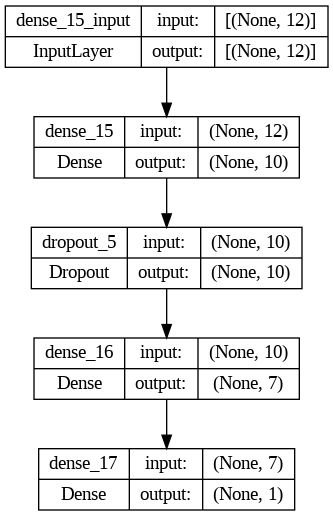

In [ ]:
# Show the network architecture
plot_model(MLP1, to_file='network_architecture1.png', show_shapes=True, show_layer_names=True)

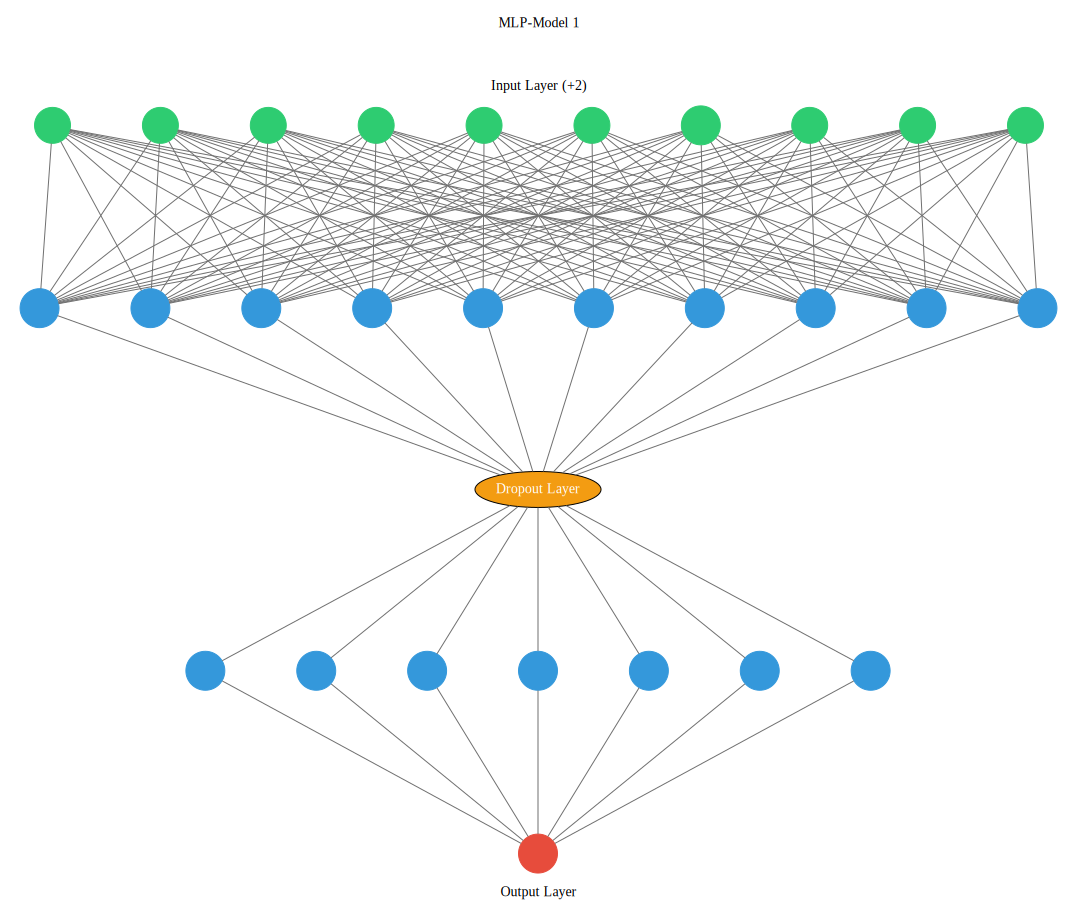

In [ ]:
# Show the network architecture
ann_viz(MLP1, filename="MLP1_model.gv", title="MLP-Model 1")

graphfile1=graphviz.Source.from_file("MLP1_model.gv")
graphfile1

In [ ]:
MLP1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#Train with training set
historyMLP1 = MLP1.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 1s 4ms/step - loss: 0.6281 - accuracy: 0.6974 - val_loss: 0.5616 - val_accuracy: 0.7469
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.5189 - accuracy: 0.7458 - val_loss: 0.4777 - val_accuracy: 0.7469
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4357 - accuracy: 0.7458 - val_loss: 0.3887 - val_accuracy: 0.7469
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.3411 - accuracy: 0.8656 - val_loss: 0.2926 - val_accuracy: 0.9568
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2520 - accuracy: 0.9784 - val_loss: 0.2139 - val_accuracy: 0.9868
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1868 - accuracy: 0.9887 - val_loss: 0.1618 - val_accuracy: 0.9900
Epoch 7/20
133/133 [==============================] - 0s 4ms/step - loss: 0.1440 - accuracy: 0.9892 - val_loss: 0.1282 - val_accuracy: 0.9900
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_MLP1=np.round(MLP1.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred_MLP1[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
#Accuracy
valloss_MLP1, valacc_MLP1 = MLP1.evaluate(X_val, y_val, verbose=0)
trainloss_MLP1, trainacc_MLP1 = MLP1.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_MLP1)
print("Training Loss          :", trainloss_MLP1)
print("Validation Accuracy :", valacc_MLP1)
print("Validation Loss     :", valloss_MLP1)

Training Accuracy      : 0.9934210777282715
Training Loss          : 0.03582022339105606
Validation Accuracy : 0.9906014800071716
Validation Loss     : 0.042483046650886536


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          399          5
TRUE: Red             10       1182


Axes(0.125,0.11;0.62x0.77)


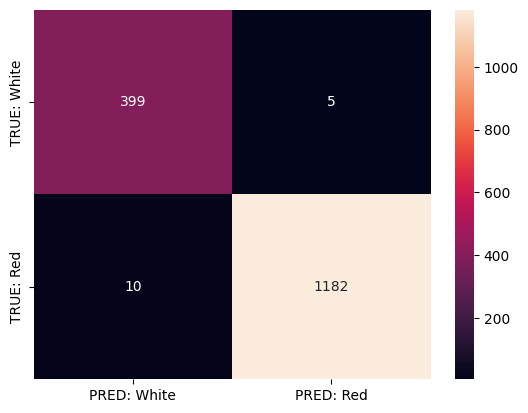

In [ ]:
#Confusion matrix
cm_MLP1=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_MLP1, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_MLP1)

# Plot the confusion matrix
print("\n")
print(sns.heatmap(cm_MLP1, annot=True, fmt="d"))

In [ ]:
#Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_MLP1))

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1192
           1       0.98      0.99      0.98       404

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



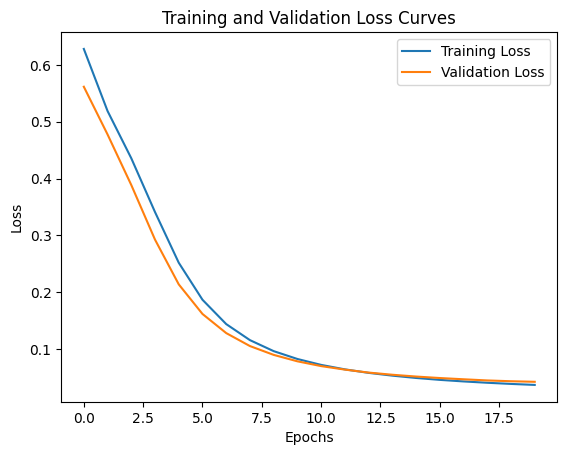

In [ ]:
#Training and Validation Loss Curve
#https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/
#https://towardsdatascience.com/useful-plots-to-diagnose-your-neural-network-521907fa2f45#:~:text=Loss%20Curve,in%20which%20the%20network%20learns.
#https://www.baeldung.com/cs/learning-curve-ml#:~:text=The%20training%20loss%20indicates%20how,the%20model%20fits%20new%20data.

# Plot the training/validation loss curves
plt.plot(historyMLP1.history['loss'], label='Training Loss')
plt.plot(historyMLP1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Observation: The plot of training loss continues to decrease with experience while the plot of validation loss decreases and reaches a stable state. This plot of learning curves shows slightly overfitting.

Second Neural Network Architecture
1.   Activation function     : ReLu
2.   Number of Hidden Layers : 2
3.   Number of Neural Network: [12,10,7,1]
4.   Dropout                 : 0.00006

In [ ]:
#Initialise constructor
MLP2=Sequential()

# Add first hidden layer
MLP2.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a dropout to overcome overfitting (regularisation for ANN)
MLP2.add((Dropout(0.00006)))

# Add second hidden layer
MLP2.add(Dense(7,activation='relu'))


# Add an output layer
MLP2.add(Dense(1,activation='sigmoid'))

In [ ]:
# Show neural network in textual form
MLP2.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_39 (Dense)            (None, 10)                130       
                                                                 
 dropout_13 (Dropout)        (None, 10)                0         
                                                                 
 dense_40 (Dense)            (None, 7)                 77        
                                                                 
 dense_41 (Dense)            (None, 1)                 8         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


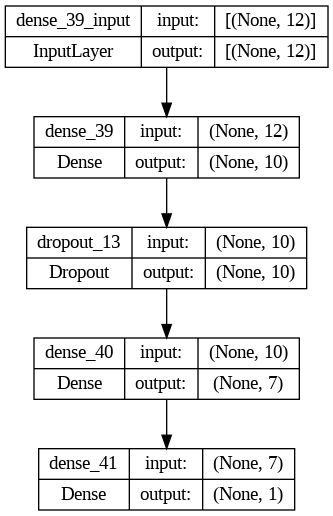

In [ ]:
# Show the network architecture
plot_model(MLP2, to_file='network_architecture2.png', show_shapes=True, show_layer_names=True)

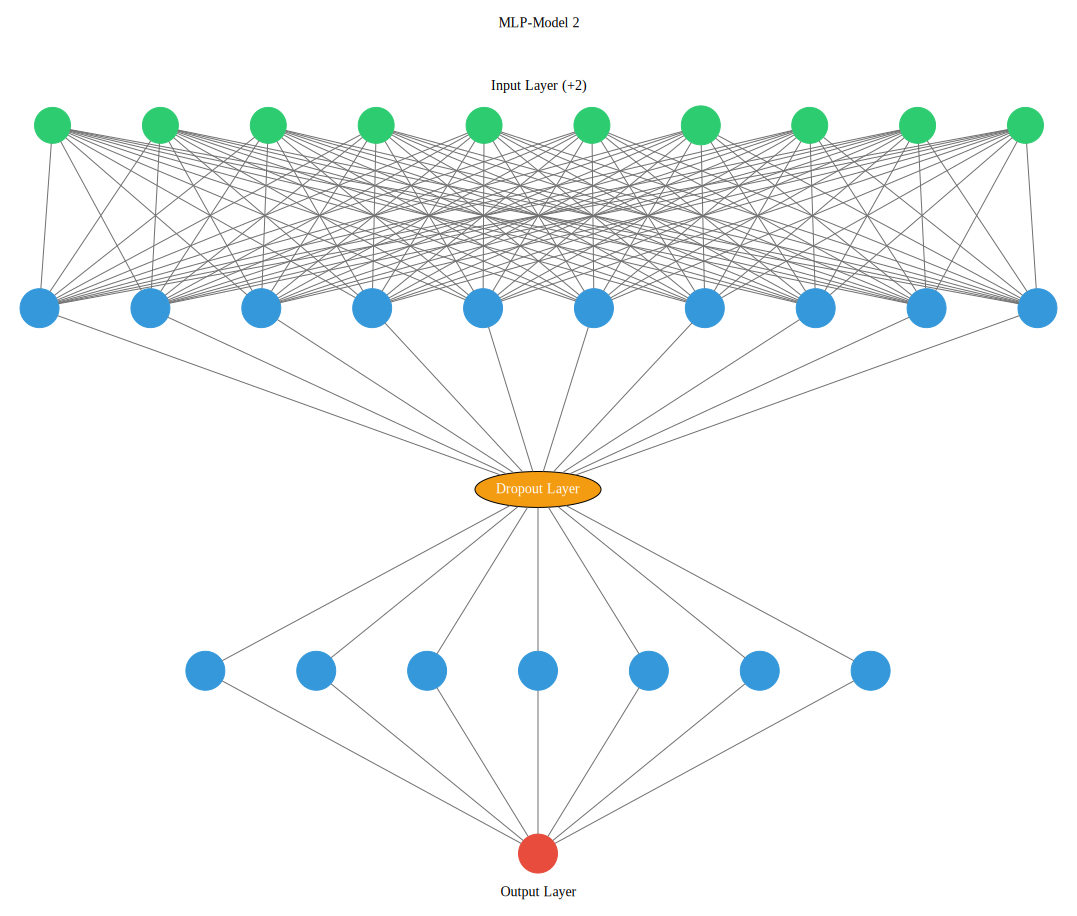

In [ ]:
# Show the network architecture
ann_viz(MLP2, filename="MLP2_model.gv", title="MLP-Model 2")

graphfile2=graphviz.Source.from_file("MLP2_model.gv")
graphfile2

In [ ]:
MLP2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
#Train with training set
historyMLP2 = MLP2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 2s 6ms/step - loss: 0.6863 - accuracy: 0.6541 - val_loss: 0.5471 - val_accuracy: 0.8985
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 0.3383 - accuracy: 0.9417 - val_loss: 0.1911 - val_accuracy: 0.9668
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1243 - accuracy: 0.9793 - val_loss: 0.0879 - val_accuracy: 0.9768
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.9850 - val_loss: 0.0627 - val_accuracy: 0.9862
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0575 - accuracy: 0.9887 - val_loss: 0.0521 - val_accuracy: 0.9875
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0498 - accuracy: 0.9911 - val_loss: 0.0472 - val_accuracy: 0.9893
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0457 - accuracy: 0.9915 - val_loss: 0.0441 - val_accuracy: 0.9887
Epoch 

In [ ]:
#Evaluate with validation set
y_pred_MLP2=np.round(MLP2.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred_MLP2[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# Accuracy
valloss_MLP2, valacc_MLP2 = MLP2.evaluate(X_val, y_val, verbose=0)
trainloss_MLP2, trainacc_MLP2 = MLP2.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_MLP2)
print("Training Loss          :", trainloss_MLP2)
print("Validation Accuracy :", valacc_MLP2)
print("Validation Loss     :", valloss_MLP2)

Training Accuracy      : 0.994830846786499
Training Loss          : 0.028088264167308807
Validation Accuracy : 0.9924812316894531
Validation Loss     : 0.03262375295162201


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          398          6
TRUE: Red              6       1186


Axes(0.125,0.11;0.62x0.77)


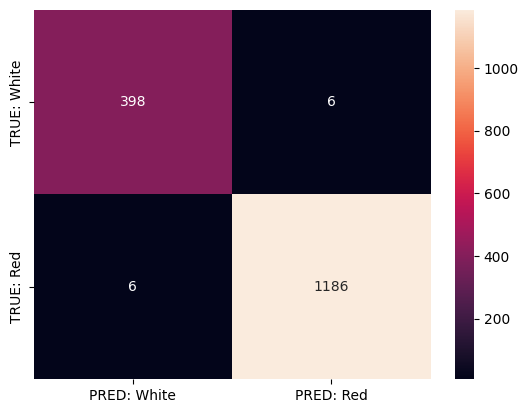

In [ ]:
# Confusion matrix
cm_MLP2=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_MLP2, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_MLP2)

# Plot the confusion matrix
print("\n")
print(sns.heatmap(cm_MLP2, annot=True, fmt="d"))

In [ ]:
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_MLP2))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1192
           1       0.99      0.99      0.99       404

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



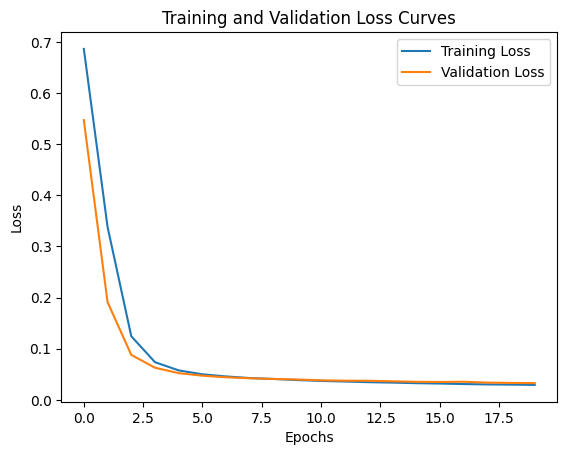

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyMLP2.history['loss'], label='Training Loss')
plt.plot(historyMLP2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Observation: The plot of training loss decreases to a point of stability. The plot of validation loss decreases to a point of stability and has a small gap with the training loss. This plot of learning curves shows a good fit.

Third Neural Network Architecture
1.   Activation function     : Tanh
2.   Number of Hidden Layers : 2
3.   Number of Neural Network: [12,10,7,1]
4.   Dropout                 : 0.001

In [ ]:
# Initialise constructor
MLP3=Sequential()

# Add first hidden layer
MLP3.add(Dense(10, activation='tanh', input_shape=(12,)))

# Add a dropout to overcome overfitting (regularisation for ANN)
MLP3.add((Dropout(0.001)))

# Add second hidden layer
MLP3.add(Dense(7,activation='tanh'))

# Add an output layer
MLP3.add(Dense(1,activation='sigmoid'))

In [ ]:
# Show neural network in textual form
MLP3.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_45 (Dense)            (None, 10)                130       
                                                                 
 dropout_15 (Dropout)        (None, 10)                0         
                                                                 
 dense_46 (Dense)            (None, 7)                 77        
                                                                 
 dense_47 (Dense)            (None, 1)                 8         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


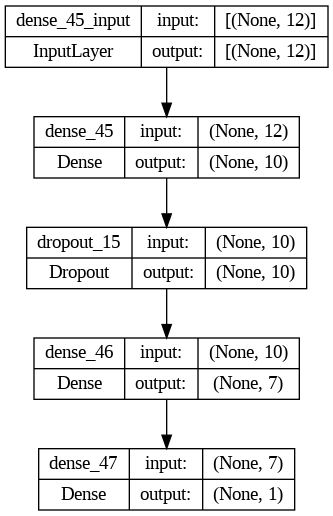

In [ ]:
# Show the network architecture
plot_model(MLP3, to_file='network_architecture3.png', show_shapes=True, show_layer_names=True)

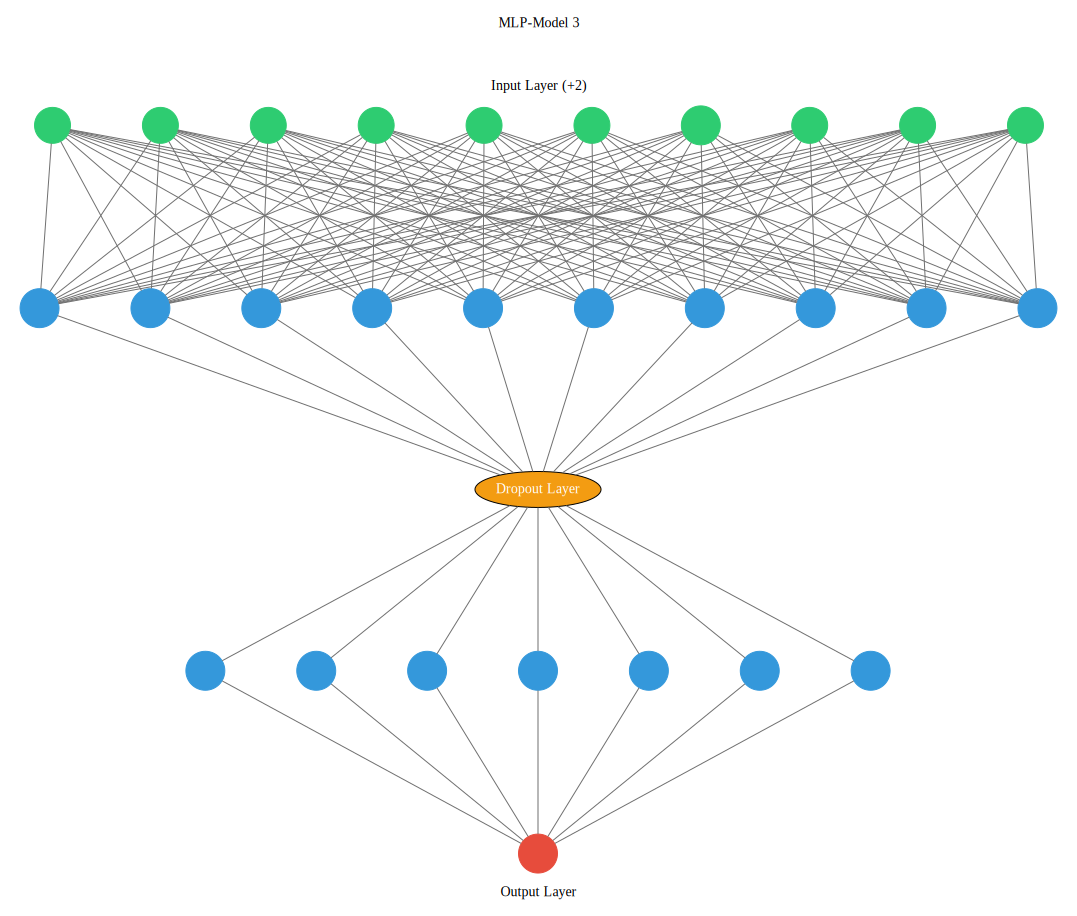

In [ ]:
# Show the network architecture
ann_viz(MLP3, filename="MLP3_model.gv", title="MLP-Model 3")

graphfile3=graphviz.Source.from_file("MLP3_model.gv")
graphfile3

In [ ]:
MLP3.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train with training set
historyMLP3 = MLP3.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4963 - accuracy: 0.7726 - val_loss: 0.3054 - val_accuracy: 0.9173
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9591 - val_loss: 0.1460 - val_accuracy: 0.9680
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1108 - accuracy: 0.9765 - val_loss: 0.0918 - val_accuracy: 0.9812
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0782 - accuracy: 0.9812 - val_loss: 0.0691 - val_accuracy: 0.9837
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0627 - accuracy: 0.9836 - val_loss: 0.0576 - val_accuracy: 0.9850
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0525 - accuracy: 0.9859 - val_loss: 0.0510 - val_accuracy: 0.9887
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0469 - accuracy: 0.9887 - val_loss: 0.0467 - val_accuracy: 0.9893
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_MLP3=np.round(MLP3.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred_MLP3[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# Accuracy
valloss_MLP3, valacc_MLP3 = MLP3.evaluate(X_val, y_val, verbose=0)
trainloss_MLP3, trainacc_MLP3 = MLP3.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_MLP3)
print("Training Loss          :", trainloss_MLP3)
print("Validation Accuracy :", valacc_MLP3)
print("Validation Loss     :", valloss_MLP3)

Training Accuracy      : 0.9957706928253174
Training Loss          : 0.025050539523363113
Validation Accuracy : 0.9893483519554138
Validation Loss     : 0.03405197709798813


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          398          6
TRUE: Red             11       1181


Axes(0.125,0.11;0.62x0.77)


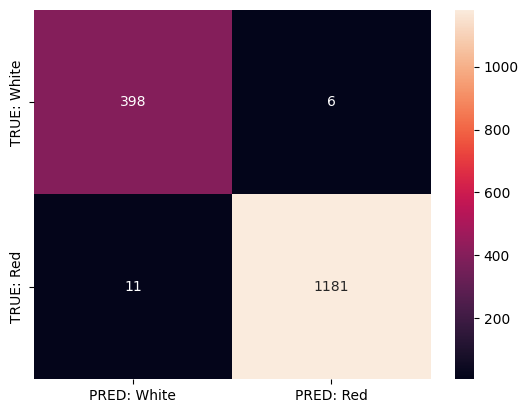

In [ ]:
# Confusion matrix
cm_MLP3=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_MLP3, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_MLP3)

# Plot the confusion matrix
print("\n")
print(sns.heatmap(cm_MLP3, annot=True, fmt="d"))

In [ ]:
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_MLP3))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1192
           1       0.97      0.99      0.98       404

    accuracy                           0.99      1596
   macro avg       0.98      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



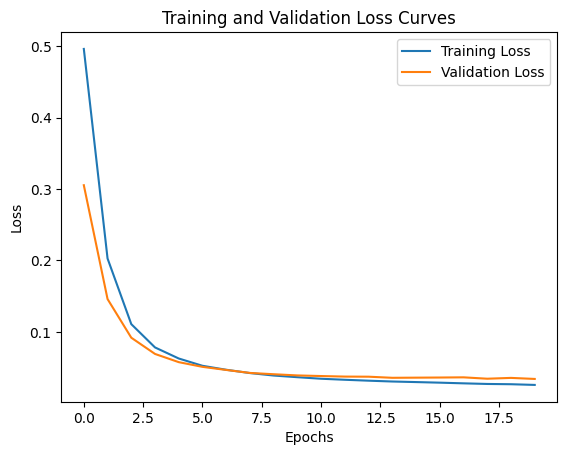

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyMLP3.history['loss'], label='Training Loss')
plt.plot(historyMLP3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Observation: The plot of training loss continues to decrease with experience while the plot of validation loss decreases and reaches a stable state. This plot of learning curves shows overfitting.
The gap between the two curves is bigger than the gap between the curves of the first and second neural network architectures.

Fourth Neural Network Architecture
1.   Activation function     : SoftMax
2.   Number of Hidden Layers : 2
3.   Number of Neural Network: [12,10,7,1]
4.   Dropout                 : 0.0025

In [ ]:
# Initialise constructor
MLP4=Sequential()

# Add first hidden layer
MLP4.add(Dense(10, activation='softmax', input_shape=(12,)))

# Add dropout to overcome overfitting
MLP4.add((Dropout(0.0025)))

# Add second hidden layer
MLP4.add(Dense(7,activation='softmax'))

# Add an output layer
MLP4.add(Dense(1,activation='sigmoid'))

#add dropout during optimization
#model.add((Dropout(dropout_rate)))

In [ ]:
#Show neural network in textual form
MLP4.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 10)                130       
                                                                 
 dropout_9 (Dropout)         (None, 10)                0         
                                                                 
 dense_28 (Dense)            (None, 7)                 77        
                                                                 
 dense_29 (Dense)            (None, 1)                 8         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


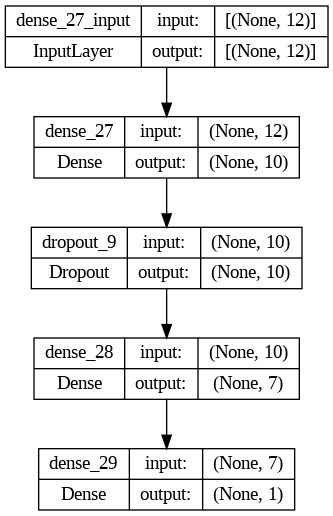

In [ ]:
# Show the network architecture
plot_model(MLP4, to_file='network_architecture4.png', show_shapes=True, show_layer_names=True)

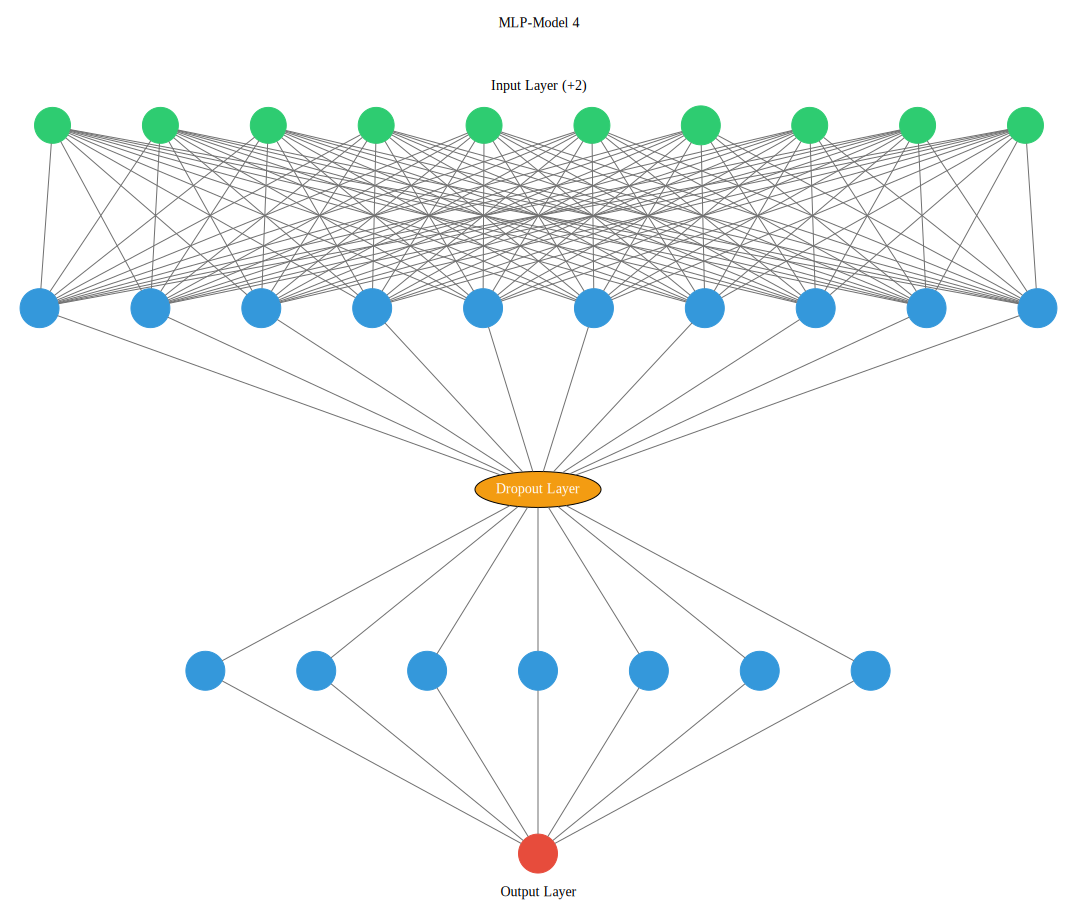

In [ ]:
# Show the network architecture
ann_viz(MLP4, filename="MLP4_model.gv", title="MLP-Model 4")

graphfile4=graphviz.Source.from_file("MLP4_model.gv")
graphfile4

In [ ]:
MLP4.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train with training set
historyMLP4 = MLP4.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 2s 7ms/step - loss: 0.6426 - accuracy: 0.7458 - val_loss: 0.6101 - val_accuracy: 0.7469
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 0.5766 - accuracy: 0.7458 - val_loss: 0.5422 - val_accuracy: 0.7469
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.5071 - accuracy: 0.7458 - val_loss: 0.4730 - val_accuracy: 0.7469
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.4404 - accuracy: 0.7458 - val_loss: 0.4074 - val_accuracy: 0.7469
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.3756 - accuracy: 0.8214 - val_loss: 0.3431 - val_accuracy: 0.9561
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.3141 - accuracy: 0.9779 - val_loss: 0.2879 - val_accuracy: 0.9831
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2659 - accuracy: 0.9868 - val_loss: 0.2449 - val_accuracy: 0.9856
Epoch 

In [ ]:
# Evaluate with valildation set
y_pred_MLP4=np.round(MLP4.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred_MLP4[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# Accuracy
valloss_MLP4, valacc_MLP4 = MLP4.evaluate(X_val, y_val, verbose=0)
trainloss_MLP4, trainacc_MLP4 = MLP4.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_MLP4)
print("Training Loss          :", trainloss_MLP4)
print("Validation Accuracy :", valacc_MLP4)
print("Validation Loss     :", valloss_MLP4)

Training Accuracy      : 0.994830846786499
Training Loss          : 0.07120141386985779
Validation Accuracy : 0.9899749159812927
Validation Loss     : 0.07787831872701645


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          398          6
TRUE: Red             10       1182


Axes(0.125,0.11;0.62x0.77)


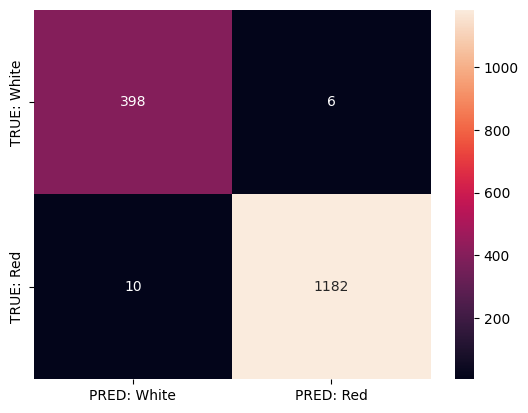

In [ ]:
# Confusion matrix
cm_MLP4=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_MLP4, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_MLP4)

# Plot the confusion matrix
print("\n")
print(sns.heatmap(cm_MLP4, annot=True, fmt="d"))

In [ ]:
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_MLP4))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1192
           1       0.98      0.99      0.98       404

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



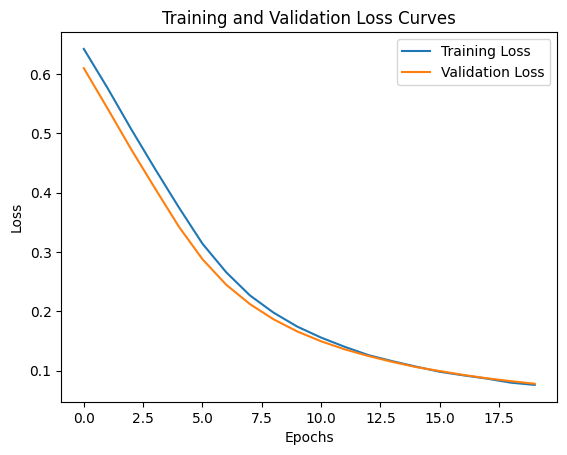

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyMLP4.history['loss'], label='Training Loss')
plt.plot(historyMLP4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Observation: The plot of training loss  and the plot of validation loss continue to decrease with experience without reaching a stable state. This indicates that the model has low learning rate. The training loss continues to decrease until the end of training means the neural network architecture is underfitted.

Fifth Neural Network Architecture
1.   Activation function     : Linear
2.   Number of Hidden Layers : 2
3.   Number of Neural Network: [12,10,7,1]
4.   Dropout                 : 0.05

In [ ]:
# Initialise constructor
MLP5=Sequential()

# Add two hidden layers
MLP5.add(Dense(10, activation='linear', input_shape=(12,)))

#Add drop out for overcoming overfitting problem
MLP5.add((Dropout(0.05)))

MLP5.add(Dense(7,activation='linear'))

# Add an output layer
MLP5.add(Dense(1,activation='sigmoid'))

#add dropout during optimization
#model.add((Dropout(dropout_rate)))

In [ ]:
# Show neural network in textual form
MLP5.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 10)                130       
                                                                 
 dropout_10 (Dropout)        (None, 10)                0         
                                                                 
 dense_31 (Dense)            (None, 7)                 77        
                                                                 
 dense_32 (Dense)            (None, 1)                 8         
                                                                 
Total params: 215
Trainable params: 215
Non-trainable params: 0
_________________________________________________________________


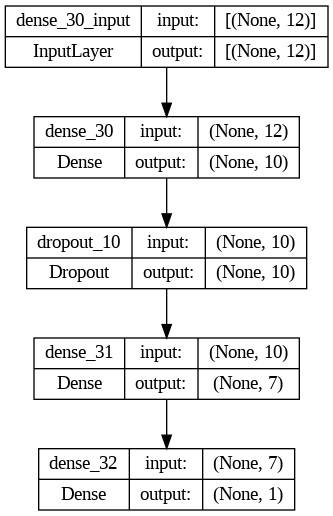

In [ ]:
# Show the network architecture
plot_model(MLP5, to_file='network_architecture5.png', show_shapes=True, show_layer_names=True)

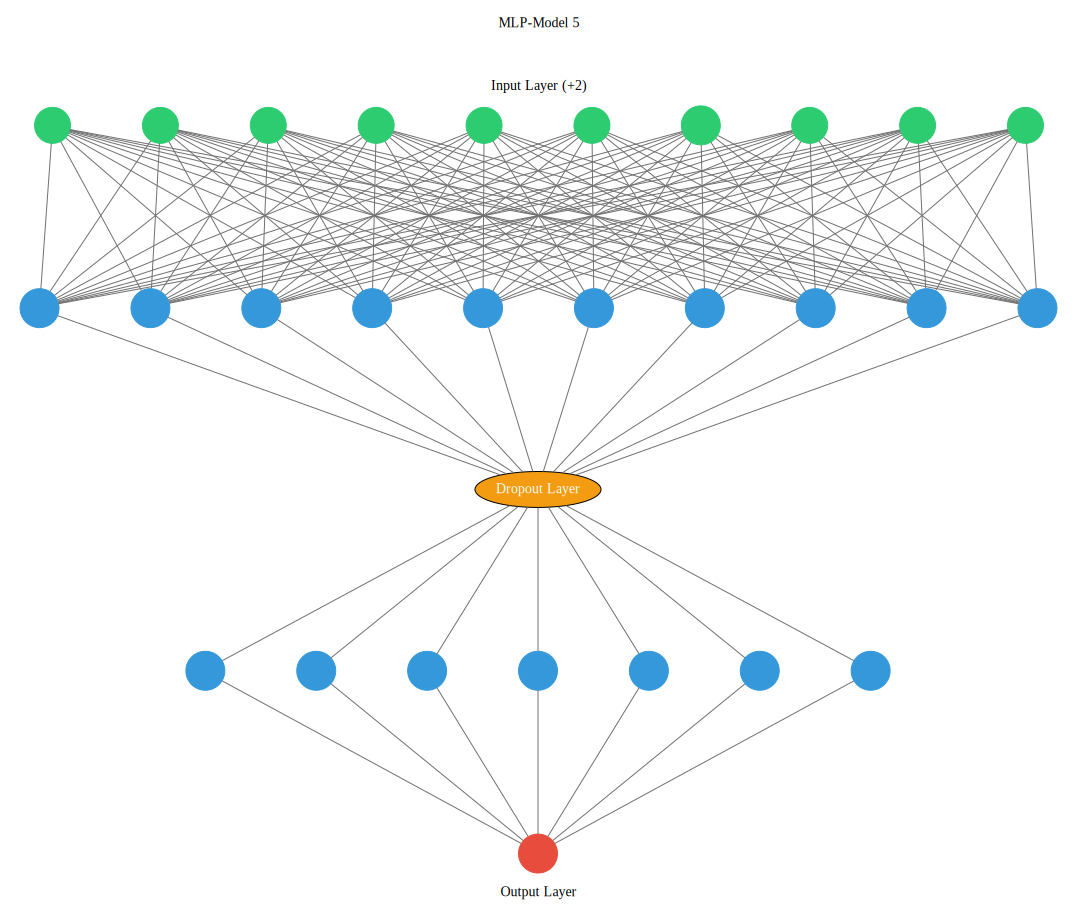

In [ ]:
# Show the network architecture
ann_viz(MLP5, filename="MLP5_model.gv", title="MLP-Model 5")

graphfile5=graphviz.Source.from_file("MLP5_model.gv")
graphfile5

In [ ]:
MLP5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Train with training set
historyMLP5 = MLP5.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4689 - accuracy: 0.7951 - val_loss: 0.1874 - val_accuracy: 0.9380
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1686 - accuracy: 0.9478 - val_loss: 0.0991 - val_accuracy: 0.9799
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1122 - accuracy: 0.9662 - val_loss: 0.0745 - val_accuracy: 0.9837
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0921 - accuracy: 0.9713 - val_loss: 0.0648 - val_accuracy: 0.9850
Epoch 5/20
133/133 [==============================] - 1s 5ms/step - loss: 0.0842 - accuracy: 0.9751 - val_loss: 0.0600 - val_accuracy: 0.9862
Epoch 6/20
133/133 [==============================] - 1s 5ms/step - loss: 0.0650 - accuracy: 0.9831 - val_loss: 0.0563 - val_accuracy: 0.9868
Epoch 7/20
133/133 [==============================] - 1s 5ms/step - loss: 0.0666 - accuracy: 0.9821 - val_loss: 0.0531 - val_accuracy: 0.9868
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_MLP5=np.round(MLP5.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
y_pred_MLP5[0:5]

array([[0.],
       [0.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [ ]:
# Accuracy
valloss_MLP5, valacc_MLP5 = MLP5.evaluate(X_val, y_val, verbose=0)
trainloss_MLP5, trainacc_MLP5 = MLP5.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_MLP5)
print("Training Loss          :", trainloss_MLP5)
print("Validation Accuracy :", valacc_MLP5)
print("Validation          :", valloss_MLP5)

Training Accuracy      : 0.9924812316894531
Training Loss          : 0.04461326450109482
Validation Accuracy : 0.9899749159812927
Validation          : 0.04716278612613678


Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          398          6
TRUE: Red             10       1182


Axes(0.125,0.11;0.62x0.77)


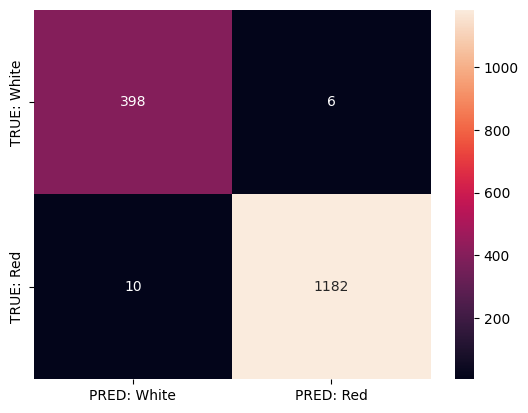

In [ ]:
# Confusion matrix
cm_MLP5=pd.DataFrame(metrics.confusion_matrix(y_val, y_pred_MLP4, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_MLP5)

# Plot the confusion matrix
print("\n")
print(sns.heatmap(cm_MLP5, annot=True, fmt="d"))

In [ ]:
# Classification report
print("Classification Report\n")
print(classification_report(y_val,y_pred_MLP5))

Classification Report

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1192
           1       0.98      0.98      0.98       404

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



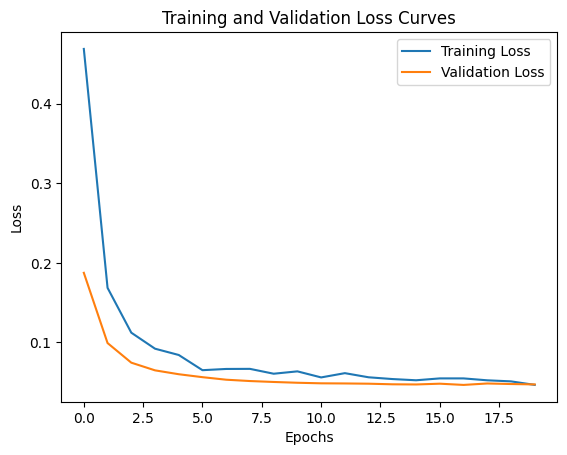

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyMLP5.history['loss'], label='Training Loss')
plt.plot(historyMLP5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

Observation: The plot of training loss decreases to a point of stability. The plot of validation loss decreases to a point of stability and has a small gap with the training loss. This plot of learning curves shows a good fit. However, the curves overlap with each other later than the two curves for the second neural network.

**Observation and Analysis Report**


> First Neural Network Architecture

The plot of training loss continues to decrease with experience while the plot of validation loss decreases and reaches a stable state. This plot of learning curves shows slightly overfitting.

Training Accuracy      : 0.9934210777282715

Training Loss          : 0.03582022339105606

Validation Accuracy : 0.9906014800071716

Validation Loss     : 0.042483046650886536

> Second Neural Network Architecture

The plot of training loss decreases to a point of stability. The plot of validation loss decreases to a point of stability and has a small gap with the training loss. This plot of learning curves shows a good fit.

Training Accuracy      : 0.994830846786499

Training Loss          : 0.028088264167308807

Validation Accuracy : 0.9924812316894531

Validation Loss     : 0.03262375295162201

> Third Neural Network Architecture

Observation: The plot of training loss continues to decrease with experience while the plot of validation loss decreases and reaches a stable state. This plot of learning curves shows overfitting.
The gap between the two curves is bigger than the gap between the curves of the first and second neural network architectures.

Training Accuracy      : 0.9957706928253174

Training Loss          : 0.025050539523363113

Validation Accuracy : 0.9893483519554138

Validation Loss     : 0.03405197709798813

> Fourth Neural Network Architecture

The plot of training loss  and the plot of validation loss continue to decrease with experience without reaching a stable state. This indicates that the model has low learning rate. The training loss continues to decrease until the end of training means the neural network architecture is underfitted.

Training Accuracy      : 0.994830846786499

Training Loss          : 0.07120141386985779

Validation Accuracy : 0.9899749159812927

Validation Loss     : 0.07787831872701645

> Fifth Neural Network Architecture

The plot of training loss decreases to a point of stability. The plot of validation loss decreases to a point of stability and has a small gap with the training loss. This plot of learning curves shows a good fit. However, the curves overlap with each other later than the two curves for the second neural network.

Training Accuracy      : 0.9924812316894531

Training Loss          : 0.04461326450109482

Validation Accuracy : 0.9899749159812927

Validation          : 0.04716278612613678










Best model is chosen based on low training loss, low validation loss, minimal gap between training and validation loss curves and high validation accuracy.

Based on the observation, the best model is the second neural network architecture as it has the smallest gap between training and validation loss curves, lowest validation loss, lowest training loss and the highest validation accuracy.

# **Model Tuning**

Best Neural Network Architecture:

Second Neural Network Architecture
1.   Activation function     : ReLu
2.   Number of Hidden Layers : 2
3.   Number of Neural Network: [12,10,7,1]
4.   Dropout                 : 0.00006

Justification: Based on evaluation


**Hypertuning**

**Set 1**

Optimiser: Adam

Learning Rate: 0.0005

In [ ]:
# Initialise constructor
HM1=Sequential()

# Add first hidden layer
HM1.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a dropout to overcome overfitting (regularisation for ANN)
HM1.add((Dropout(0.00006)))

# Add second hidden layer
HM1.add(Dense(7,activation='relu'))

# Add an output layer
HM1.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimiser
learning_rate = 0.0005
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified learning rate
HM1.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train with training set
historyHM1 = HM1.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)


Epoch 1/20
133/133 [==============================] - 2s 11ms/step - loss: 1.1080 - accuracy: 0.1311 - val_loss: 0.8798 - val_accuracy: 0.2719
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.6974 - accuracy: 0.5493 - val_loss: 0.5283 - val_accuracy: 0.7907
Epoch 3/20
133/133 [==============================] - 1s 4ms/step - loss: 0.4009 - accuracy: 0.8463 - val_loss: 0.3137 - val_accuracy: 0.8797
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2422 - accuracy: 0.9140 - val_loss: 0.1910 - val_accuracy: 0.9455
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1570 - accuracy: 0.9582 - val_loss: 0.1274 - val_accuracy: 0.9749
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1125 - accuracy: 0.9718 - val_loss: 0.0934 - val_accuracy: 0.9793
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0884 - accuracy: 0.9770 - val_loss: 0.0751 - val_accuracy: 0.9818
Epoch

In [ ]:
y_pred_HM1=np.round(HM1.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate with validation set
# Accuracy
valloss_HM1, valacc_HM1 = HM1.evaluate(X_val, y_val, verbose=0)
trainloss_HM1, trainacc_HM1 = HM1.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_HM1)
print("Training Loss          :", trainloss_HM1)
print("Validation Accuracy :", valacc_HM1)
print("Validation Loss     :", valloss_HM1)

Training Accuracy      : 0.9934210777282715
Training Loss          : 0.03553019464015961
Validation Accuracy : 0.9918546080589294
Validation Loss     : 0.03661966323852539


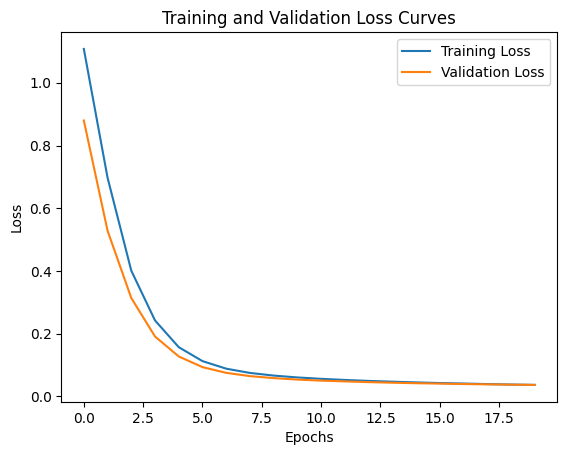

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyHM1.history['loss'], label='Training Loss')
plt.plot(historyHM1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Set 2**

Optimiser: Adam

Learning Rate: 0.001

In [ ]:
# Initialise constructor
HM2=Sequential()

# Add first hidden layer
HM2.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a drop out to overcome overfitting (regularisation for ANN)
HM2.add((Dropout(0.0005)))

# Add second hidden layer
HM2.add(Dense(7,activation='relu'))

# Add an output layer
HM2.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimiser
learning_rate = 0.001
optimizer = Adam(learning_rate=learning_rate)

# Compile the model with the specified learning rate
HM2.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train with training set
historyHM2 = HM2.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 4s 4ms/step - loss: 0.5912 - accuracy: 0.7354 - val_loss: 0.4758 - val_accuracy: 0.7625
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2962 - accuracy: 0.8755 - val_loss: 0.1473 - val_accuracy: 0.9555
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1038 - accuracy: 0.9713 - val_loss: 0.0837 - val_accuracy: 0.9768
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0733 - accuracy: 0.9803 - val_loss: 0.0682 - val_accuracy: 0.9831
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0624 - accuracy: 0.9836 - val_loss: 0.0600 - val_accuracy: 0.9843
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0563 - accuracy: 0.9854 - val_loss: 0.0547 - val_accuracy: 0.9862
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0510 - accuracy: 0.9859 - val_loss: 0.0500 - val_accuracy: 0.9868
Epoch 

In [ ]:
y_pred_HM2=np.round(HM2.predict(X_val))

50/50 [==============================] - 0s 2ms/step


In [ ]:
# Evaluate with valildation set
# Accuracy
valloss_HM2, valacc_HM2 = HM2.evaluate(X_val, y_val, verbose=0)
trainloss_HM2, trainacc_HM2 = HM2.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_HM2)
print("Training Loss          :", trainloss_HM2)
print("Validation Accuracy :", valacc_HM2)
print("Validation Loss     :", valloss_HM2)

Training Accuracy      : 0.9962406158447266
Training Loss          : 0.023364098742604256
Validation Accuracy : 0.9924812316894531
Validation Loss     : 0.0278130155056715


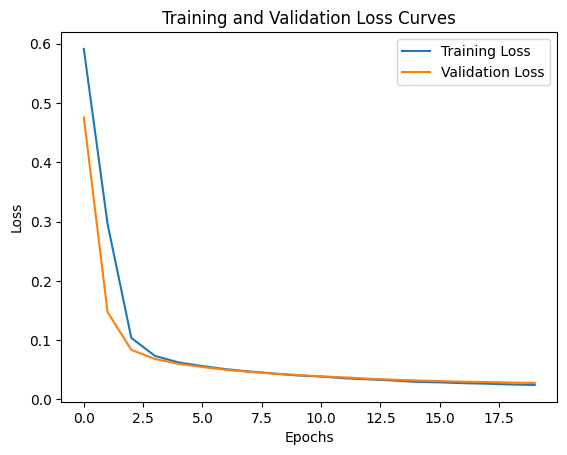

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyHM2.history['loss'], label='Training Loss')
plt.plot(historyHM2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Set 3**

Optimizer: RMSProp

Learning Rate: 0.0005

In [ ]:
# Initialise constructor
HM3=Sequential()

# Add first hidden layer
HM3.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a drop out to overcome overfitting(regularisation for ANN)
HM3.add((Dropout(0.001)))

# Add second hidden layer
HM3.add(Dense(7,activation='relu'))

# Add an output layer
HM3.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimiser
learning_rate = 0.0005
optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the specified learning rate
HM3.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
# Train with training set
historyHM3 = HM3.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 2s 7ms/step - loss: 0.3916 - accuracy: 0.8383 - val_loss: 0.3059 - val_accuracy: 0.8747
Epoch 2/20
133/133 [==============================] - 1s 5ms/step - loss: 0.2201 - accuracy: 0.9384 - val_loss: 0.1689 - val_accuracy: 0.9518
Epoch 3/20
133/133 [==============================] - 1s 5ms/step - loss: 0.1312 - accuracy: 0.9633 - val_loss: 0.1098 - val_accuracy: 0.9687
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9742 - val_loss: 0.0815 - val_accuracy: 0.9781
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0748 - accuracy: 0.9784 - val_loss: 0.0669 - val_accuracy: 0.9831
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0645 - accuracy: 0.9826 - val_loss: 0.0591 - val_accuracy: 0.9837
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0583 - accuracy: 0.9845 - val_loss: 0.0542 - val_accuracy: 0.9856
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_HM3=np.round(HM3.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
#Accuracy
valloss_HM3, valacc_HM3 = HM3.evaluate(X_val, y_val, verbose=0)
trainloss_HM3, trainacc_HM3 = HM3.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_HM3)
print("Training Loss          :", trainloss_HM3)
print("Validation Accuracy :", valacc_HM3)
print("Validation Loss     :", valloss_HM3)

Training Accuracy      : 0.9934210777282715
Training Loss          : 0.036187544465065
Validation Accuracy : 0.9912280440330505
Validation Loss     : 0.03745517507195473


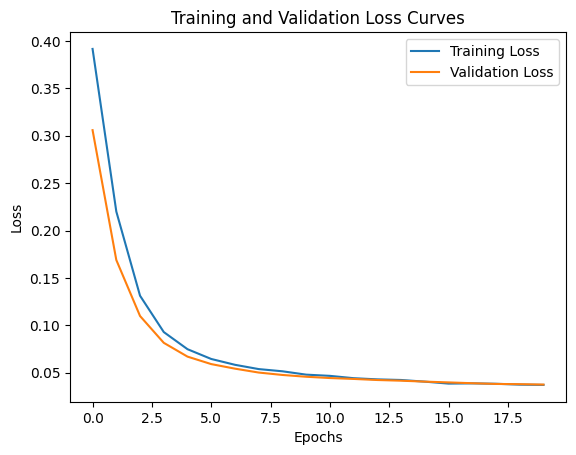

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyHM3.history['loss'], label='Training Loss')
plt.plot(historyHM3.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Set 4**

Optimizer: RMSProp

Learning Rate: 0.001

In [ ]:
# Initialise constructor
HM4=Sequential()

# Add first hidden layer
HM4.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a drop out to overcome overfitting(regularisation for ANN)
HM4.add((Dropout(0.005)))

# Add second hidden layer
HM4.add(Dense(7,activation='relu'))

# Add an output layer
HM4.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimizer
learning_rate = 0.001
optimizer = RMSprop(learning_rate=learning_rate)

# Compile the model with the specified learning rate
HM4.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train with training set
historyHM4 = HM4.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 3s 8ms/step - loss: 0.3443 - accuracy: 0.8980 - val_loss: 0.1452 - val_accuracy: 0.9718
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0929 - accuracy: 0.9789 - val_loss: 0.0658 - val_accuracy: 0.9837
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0610 - accuracy: 0.9836 - val_loss: 0.0496 - val_accuracy: 0.9887
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0506 - accuracy: 0.9868 - val_loss: 0.0450 - val_accuracy: 0.9893
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0451 - accuracy: 0.9901 - val_loss: 0.0409 - val_accuracy: 0.9875
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0419 - accuracy: 0.9920 - val_loss: 0.0390 - val_accuracy: 0.9893
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0401 - accuracy: 0.9930 - val_loss: 0.0374 - val_accuracy: 0.9887
Epoch 

In [ ]:
# Evaluate with valildation set
y_pred_HM4=np.round(HM4.predict(X_val))

50/50 [==============================] - 0s 2ms/step


In [ ]:
# Accuracy
valloss_HM4, valacc_HM4 = HM4.evaluate(X_val, y_val, verbose=0)
trainloss_HM4, trainacc_HM4 = HM4.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_HM4)
print("Training Loss          :", trainloss_HM4)
print("Validation Accuracy :", valacc_HM4)
print("Validation Loss     :", valloss_HM4)

Training Accuracy      : 0.9957706928253174
Training Loss          : 0.03161642327904701
Validation Accuracy : 0.9924812316894531
Validation Loss     : 0.033797916024923325


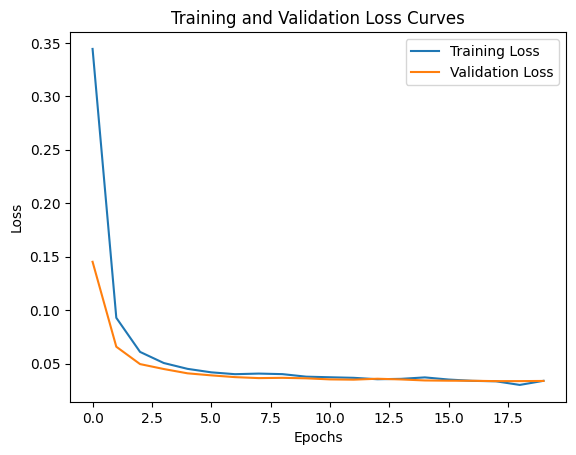

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyHM4.history['loss'], label='Training Loss')
plt.plot(historyHM4.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Set 5**

Optimizer: SGD

Learning Rate: 0.01

In [ ]:
# Initialise constructor
HM5=Sequential()

# Add first hidden layer
HM5.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a drop out to overcome overfitting(regularisation for ANN)
HM5.add((Dropout(0.005)))

# Add second hidden layer
HM5.add(Dense(7,activation='relu'))

# Add an output layer
HM5.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimiser
learning_rate = 0.01
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the specified learning rate
HM5.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train with training set
historyHM5 = HM5.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=16, verbose=1)

Epoch 1/20
133/133 [==============================] - 1s 4ms/step - loss: 0.5175 - accuracy: 0.7514 - val_loss: 0.4628 - val_accuracy: 0.7575
Epoch 2/20
133/133 [==============================] - 0s 3ms/step - loss: 0.3987 - accuracy: 0.8017 - val_loss: 0.3614 - val_accuracy: 0.8302
Epoch 3/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8839 - val_loss: 0.2690 - val_accuracy: 0.8860
Epoch 4/20
133/133 [==============================] - 0s 3ms/step - loss: 0.2122 - accuracy: 0.9356 - val_loss: 0.1896 - val_accuracy: 0.9330
Epoch 5/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1511 - accuracy: 0.9601 - val_loss: 0.1410 - val_accuracy: 0.9555
Epoch 6/20
133/133 [==============================] - 0s 3ms/step - loss: 0.1201 - accuracy: 0.9652 - val_loss: 0.1132 - val_accuracy: 0.9618
Epoch 7/20
133/133 [==============================] - 0s 3ms/step - loss: 0.0984 - accuracy: 0.9699 - val_loss: 0.0951 - val_accuracy: 0.9718
Epoch 

In [ ]:
# Evaluate with validation set
y_pred_HM5=np.round(HM5.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
# Accuracy
valloss_HM5, valacc_HM5 = HM5.evaluate(X_val, y_val, verbose=0)
trainloss_HM5, trainacc_HM5 = HM5.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_HM5)
print("Training Loss          :", trainloss_HM5)
print("Validation Accuracy :", valacc_HM5)
print("Validation Loss     :", valloss_HM5)

Training Accuracy      : 0.9906014800071716
Training Loss          : 0.04918403923511505
Validation Accuracy : 0.9849624037742615
Validation Loss     : 0.05495932325720787


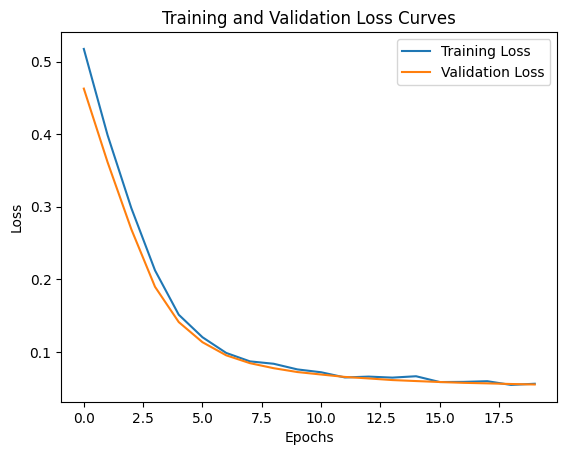

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyHM5.history['loss'], label='Training Loss')
plt.plot(historyHM5.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Set 6**

Optimizer: SGD

Learning Rate: 0.005

In [ ]:
# Initialise constructor
HM6=Sequential()

# Add first hidden layer
HM6.add(Dense(10, activation='relu', input_shape=(12,)))

# Add a drop out to overcome overfitting(regularisation for ANN)
HM5.add((Dropout(0.005)))

# Add second hidden layer
HM6.add(Dense(7,activation='relu'))

# Add an output layer
HM6.add(Dense(1,activation='sigmoid'))

# Set the learning rate and optimiser
learning_rate = 0.005
optimizer = SGD(learning_rate=learning_rate)

# Compile the model with the specified learning rate
HM6.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# Train with training set
historyHM6 = HM6.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=20, batch_size=32, verbose=1)

Epoch 1/20
67/67 [==============================] - 1s 7ms/step - loss: 0.4749 - accuracy: 0.7519 - val_loss: 0.4169 - val_accuracy: 0.7625
Epoch 2/20
67/67 [==============================] - 0s 4ms/step - loss: 0.3757 - accuracy: 0.7773 - val_loss: 0.3514 - val_accuracy: 0.8014
Epoch 3/20
67/67 [==============================] - 0s 3ms/step - loss: 0.3237 - accuracy: 0.8219 - val_loss: 0.3038 - val_accuracy: 0.8490
Epoch 4/20
67/67 [==============================] - 0s 4ms/step - loss: 0.2795 - accuracy: 0.8773 - val_loss: 0.2571 - val_accuracy: 0.9091
Epoch 5/20
67/67 [==============================] - 0s 3ms/step - loss: 0.2345 - accuracy: 0.9267 - val_loss: 0.2126 - val_accuracy: 0.9474
Epoch 6/20
67/67 [==============================] - 0s 3ms/step - loss: 0.1956 - accuracy: 0.9554 - val_loss: 0.1787 - val_accuracy: 0.9605
Epoch 7/20
67/67 [==============================] - 0s 3ms/step - loss: 0.1664 - accuracy: 0.9652 - val_loss: 0.1532 - val_accuracy: 0.9662
Epoch 8/20
67/67 [==

In [ ]:
# Evaluate with validation set
y_pred_HM6=np.round(HM6.predict(X_val))

50/50 [==============================] - 0s 1ms/step


In [ ]:
# Accuracy
valloss_HM6, valacc_HM6 = HM6.evaluate(X_val, y_val, verbose=0)
trainloss_HM6, trainacc_HM6 = HM6.evaluate(X_train, y_train, verbose=0)

print("Training Accuracy      :", trainacc_HM6)
print("Training Loss          :", trainloss_HM6)
print("Validation Accuracy :", valacc_HM6)
print("Validation Loss     :", valloss_HM6)

Training Accuracy      : 0.9854323267936707
Training Loss          : 0.0674600899219513
Validation Accuracy : 0.9849624037742615
Validation Loss     : 0.06703092157840729


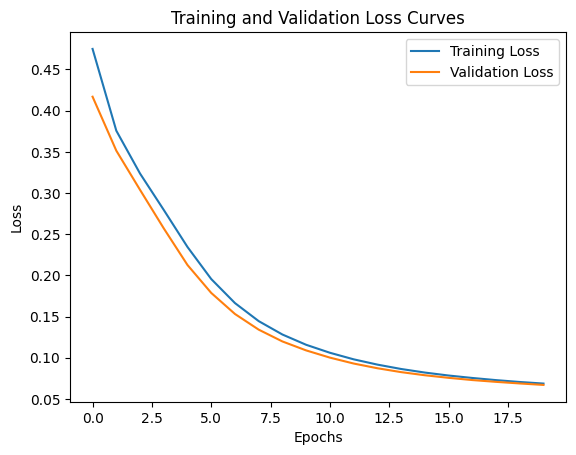

In [ ]:
# Plot the training/validation loss curves
plt.plot(historyHM6.history['loss'], label='Training Loss')
plt.plot(historyHM6.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Curves')
plt.legend()
plt.show()

**Report in the form of Table**

In [ ]:
col_names=['Fine Tuning Set','Validation Accuracy','Validation Loss']
result=np.array([['Ori',valacc_MLP1,valloss_MLP1],
                 ['1',valacc_HM1,valloss_HM1],
                 ['2',valacc_HM2,valloss_HM2],
                 ['3',valacc_HM3,valloss_HM3],
                 ['4',valacc_HM4,valloss_HM4],
                 ['5',valacc_HM5,valloss_HM5],
                 ['6',valacc_HM6,valloss_HM6],
                 ])

In [ ]:
# Create table
table=pd.DataFrame(result,columns=col_names)

# Print a list of shortforms
print("Ori: Original Set(WIthout Model Tunning)")
print("1  : Optimization(Adam),Learning Rate(0.0005)")
print("2  : Optimization(Adam),Learning Rate(0.001)")
print("3  : Optimization(RMSprop),Learning Rate(0.0005)")
print("4  : Optimization(RMSprop),Learning Rate(0.001)")
print("5  : Optimization(SGD),Learning Rate(0.01)")
print("6  : Optimization(SGD),Learning Rate(0.005)")

print("")
print("\033[1mTable of Comparision for Different Fine Tuning Method Of 2\033[0m")
#print table
table

Ori: Original Set(WIthout Model Tunning)
1  : Optimization(Adam),Learning Rate(0.0005)
2  : Optimization(Adam),Learning Rate(0.001)
3  : Optimization(RMSprop),Learning Rate(0.0005)
4  : Optimization(RMSprop),Learning Rate(0.001)
5  : Optimization(SGD),Learning Rate(0.01)
6  : Optimization(SGD),Learning Rate(0.005)

Table of Comparision for Different Fine Tuning Method Of 2


,Fine Tuning Set,Validation Accuracy,Validation Loss
0,Ori,0.9906014800071716,0.042483046650886536
1,1,0.9918546080589294,0.03661966323852539
2,2,0.9924812316894531,0.0278130155056715
3,3,0.9912280440330505,0.03745517507195473
4,4,0.9924812316894531,0.033797916024923325
5,5,0.9849624037742615,0.05495932325720787
6,6,0.9849624037742615,0.06703092157840729


# **Model Evaluation**

In [ ]:
bestmodel=HM2

# Evaluate with validation set
y_predval_B=np.round(bestmodel.predict(X_val))
valloss_B, valacc_B = bestmodel.evaluate(X_val, y_val, verbose=0)

50/50 [==============================] - 0s 1ms/step


In [ ]:
# Evaluate with test set
y_predtest_B=np.round(bestmodel.predict(X_test))
testloss_B, testacc_B = bestmodel.evaluate(X_test, y_test, verbose=0)

50/50 [==============================] - 0s 1ms/step


In [ ]:
col_names=['Validation','','Test']
result=np.array([[valloss_B,'Loss',testloss_B],
                 [valacc_B,'Accuracy',testacc_B],
                 ])

In [ ]:
# Create table
table=pd.DataFrame(result,columns=col_names)

print("\033[1mTable of Comparison for Validation Set and Testing Set\033[0m")
# Print table
table

Table of Comparison for Validation Set and Testing Set


,Validation,,Test
0,0.0278130155056715,Loss,0.02868262305855751
1,0.9924812316894531,Accuracy,0.9918546080589294


In [ ]:
print("\033[1mConfusion Matrix for Validation Set\033[0m")
cm_valB=pd.DataFrame(metrics.confusion_matrix(y_val, y_predval_B, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_valB)

print()

print("\033[1mConfusion Matrix for TestingSet\033[0m")
cm_testB=pd.DataFrame(metrics.confusion_matrix(y_test, y_predtest_B, labels=[1,0]), index=['TRUE: White', 'TRUE: Red'], columns=['PRED: White', 'PRED: Red'])
print("Confusion Matrix :\n\n",cm_testB)

Confusion Matrix for Validation Set
Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          398          6
TRUE: Red              6       1186

Confusion Matrix for TestingSet
Confusion Matrix :

              PRED: White  PRED: Red
TRUE: White          406          8
TRUE: Red              5       1177


In [ ]:
print("\033[1mClassification Report for Validation Set\033[0m")
print(classification_report(y_val,y_predval_B))
print()
print("\033[1mClassification Report for Testing Set\033[0m")
print(classification_report(y_test,y_predtest_B))

Classification Report for Validation Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1192
           1       0.99      0.99      0.99       404

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596


Classification Report for Testing Set
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1182
           1       0.99      0.98      0.98       414

    accuracy                           0.99      1596
   macro avg       0.99      0.99      0.99      1596
weighted avg       0.99      0.99      0.99      1596



# **Evaluation**

> Accuracy and Loss

The accuracy of the validation set is slightly higher than the test set. The loss of the validation set is lower than the test set. This shows that the model is performing similarly on both validation and test data.



> Confusion Matrix

There are 398 true positive in the validation data which is slightly lesser than the testing data with 406 true positive.

There are 1186 true negative in the validation data which is slightly more than the testing data with 1177 true negative

There are 6 false positive in the validation data which is more than the testing data with 5 false positive

There are 6 false negative in the validation data which is lesser than the testing data with 8 false negative

This confusion matrix suggests the model works well with both validation set and testing set.



> Classification Report

The 0 of validation set has

precision = 0.99,

recall = 0.99,

f1-score = 0.99,

support = 1192.

The 0 of testing set has

precision = 0.99,

recall = 1.00,

f1-score = 0.99,

support = 1182.

The 1 of validation set has

precision = 0.99,

recall = 0.99,

f1-score = 0.99,

support = 404.

The 1 of testing set has

precision = 0.99,

recall = 0.98,

f1-score = 0.98,

support 414.

The macro avg of validation set has

precision = 0.99,

recall = 0.99,

f1-score = 0.99,

support = 1596.

The macro avg of testing set has

precision = 0.99,

recall = 0.99,

f1-score = 0.99,

support = 1596.

The weighted avg of validation set has

precision = 0.99,

recall = 0.99,

f1-score = 0.99,

support = 1596.

The macro avg of testing set has

precision = 0.99,

recall = 0.99,

f1-score = 0.99,

support = 1596.

This comparison of classification reports suggests the model works well with both validation set and testing set.









# **Discussion**

1) Based on the observation, we could deduce that the model is generalised well and performing effectively. This is because the difference of the evaluation metric of testing and validation sets is approximately the same.

2) The validation loss and accuracy are approximately close to the test loss and accuracy. Therefore, this shows that the model is not overfitted.

3) The confusion matrix for both testing and validation sets shows a high number of true prediction and a low number of false prediction. This means that the model can correctly classify the different types of wine into their respective categories.